In [ ]:
api_key='NDIcnXVunz0wzCu4ZvUKb4AO3'
api_key_secret='0XcNY4ywnUAmH3QpWKALbujl3OudczGOJ1yw3jpnDLQWyC1E8e'
bearer_token='AAAAAAAAAAAAAAAAAAAAAIGKgwEAAAAAeYit%2BdnXZy72gynw6bzl%2BCE3sAo%3D3NPmNRia2t0lwxNVBg8eCie1ld8lnq707VPmSc6O9pEy8FSkz5'
access_token='1292745742503690245-8AlxqJSTUaLaIViTR9UtYFOGDjgFhL'
access_token_secret='mAy9bc4QfcMGwIpmOhNgPBIUWvmXfXRwsZlVHpTTA4rKB'
client_id='RFA1QXhlc0MzRXJPNzFkQzVqQkQ6MTpjaQ'
client_secret='rfOl7o24QRuT4Jexf9K3pap8xVL9PwRPXI9WNUwztopou1H7pJ'

Setting the Constants for fetching the API.

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Installing the requirements

In [ ]:
import tweepy
from textblob import TextBlob
import pandas
from IPython.display import display
import numpy
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import matplotlib.pyplot as plt

Importing libraries

In [ ]:
roberta='cardiffnlp/twitter-roberta-base-sentiment'
model=AutoModelForSequenceClassification.from_pretrained(roberta)
tokenizer=AutoTokenizer.from_pretrained(roberta)

Initializing an attribute of the Transformer

In [ ]:
companyName='Abdul Kalam'
startDate='2015-01-01'
n=365

In [ ]:
def cleanText(txt):
  txt=re.sub('#'+companyName,companyName,txt)
  txt=re.sub("#+",'',txt)
  txt=re.sub('https?:\/\/S+','',txt)
  txt=re.sub('\n','',txt)
  txt=re.sub('RT[\s]+','',txt)
  txt=re.sub('@+','@user ',txt)
  return txt

Function for cleaning the tweets using Regular Expression (Basically a part of preparing the dataset)

In [ ]:
auth=tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,wait_on_rate_limit=True)

In [ ]:
query=companyName
tweets=tweepy.Cursor(api.search, q=query, language='en', since=startDate, tweet_mode='extended').items(n)
all_tweets=[tweet.full_text for tweet in tweets]
print(len(all_tweets))

365


In [ ]:
responseTable=pandas.DataFrame(all_tweets,columns=['Tweets'])
responseTable['Tweets']=responseTable['Tweets'].apply(cleanText)
display(responseTable)

,Tweets
0,Brahmastra: KanganaRanaut says 'everyone who c...
1,Who needs a festival when he can make a normal...
2,loving it even more in the second watch. ranbi...
3,Top Five - Indian Films - Australia - Day One ...
4,Housefull 🎥🎬 Brahmashtra Mumbai is with brahma...
...,...
360,Ayan Mukerji's BrahmastraMovie : Part One – Sh...
361,https://t.co/cT9j7QRbFf
362,@user seriousfunnyguy Moral: Lassi can neutra...
363,Aur industry iss dalle ko 'renowned critic' ke...


Collecting data using the api methods

In [ ]:
result={}
for i in range(len(all_tweets)):
  try:
    encoded_tweet=tokenizer(responseTable['Tweets'][i],return_tensors='pt')

    decoded_data=model(**encoded_tweet)

    scores=decoded_data[0][0].detach().numpy()
    scores=softmax(scores)
    pol=scores[2]-scores[0]
    op=''
    if scores[0]>scores[1] and scores[0]>scores[2]:
      op='Negative'
    elif scores[1]>scores[0] and scores[1]>scores[2]:
      op='Neutral'
    elif scores[2]>scores[0] and scores[2]>scores[1]:
      op='Positive'
    scores_dict={
        'Tweet':all_tweets[i],
        'Neg':scores[0],
        'Neu':scores[1],
        'Pos':scores[2],
        'Polarity':pol,
        'Opinion':op
      }
    result[i]=scores_dict
  except RuntimeError:
    print(f"\nSize exceed for {i}th data.")




Size exceed for 200th data.


KeyboardInterrupt: ignored

In [ ]:
df=pandas.DataFrame(result).T
display(df)

,Tweet,Neg,Neu,Pos,Polarity,Opinion
0,#Brahmastra: #KanganaRanaut says 'everyone who...,0.652723,0.336399,0.010879,-0.641844,Negative
1,Who needs a festival when he can make a normal...,0.030145,0.467973,0.501882,0.471737,Positive
2,loving it even more in the second watch. ranbi...,0.001376,0.007588,0.991036,0.989661,Positive
3,Top Five - Indian Films - Australia - Day One ...,0.00423,0.18249,0.81328,0.80905,Positive
4,Housefull 🎥🎬 #Brahmashtra \nMumbai is with #br...,0.037482,0.702679,0.259839,0.222357,Neutral
...,...,...,...,...,...,...
360,Ayan Mukerji's #BrahmastraMovie : Part One – S...,0.022871,0.526418,0.450711,0.427839,Neutral
361,https://t.co/cT9j7QRbFf,0.160434,0.77507,0.064495,-0.095939,Neutral
362,@seriousfunnyguy Moral: Lassi can neutralize ...,0.044549,0.68437,0.271082,0.226533,Neutral
363,Aur industry iss dalle ko 'renowned critic' ke...,0.135312,0.727988,0.1367,0.001388,Neutral


Initializing the dataframe and transposing it since the dictionary is in column major

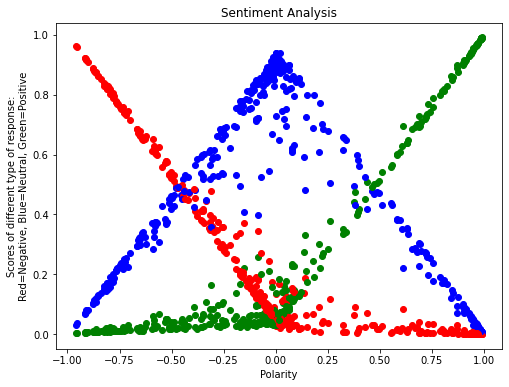

In [ ]:
plt.figure(figsize=(8,6))
for i in range(df.shape[0]):
  try:
    plt.scatter(df['Polarity'][i],df['Neg'][i],color='Red')
    plt.scatter(df['Polarity'][i],df['Neu'][i],color='Blue')
    plt.scatter(df['Polarity'][i],df['Pos'][i],color='Green')
  except KeyError:
    continue

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Scores of different type of response:\nRed=Negative, Blue=Neutral, Green=Positive')
plt.show()

Scatter plotting the scores vs polarity graph 

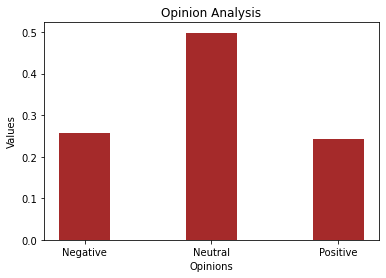

In [ ]:
avg_neg=df['Neg'].mean()
avg_neu=df['Neu'].mean()
avg_pos=df['Pos'].mean()
opinions=['Negative','Neutral','Positive']
values=[avg_neg,avg_neu,avg_pos]
plt.bar(opinions, values, color ='brown',width = 0.4)
 
plt.xlabel("Opinions")
plt.ylabel("Values")
plt.title("Opinion Analysis")
plt.show()

Plotting the Feedback and no of corresponding tweets as a bar graph

In [ ]:
def sub(txt):
  return TextBlob(txt).sentiment.subjectivity
def pol(txt):
  return TextBlob(txt).sentiment.polarity

responseTable['Subjectivity']=responseTable['Tweets'].apply(sub)
responseTable['Polarity']=responseTable['Tweets'].apply(pol)

op_list=[]
for i in range(responseTable.shape[0]):
  if responseTable['Polarity'][i]<0:
    op_list.append('Negative')
  elif responseTable['Polarity'][i]==0:
    op_list.append('Neutral')
  elif responseTable['Polarity'][i]>0:
    op_list.append('Positive')

responseTable['Opinion']=op_list
display(responseTable)

,Tweets,Subjectivity,Polarity,Opinion
0,@user ishanagarwal24 Is it better to order fro...,0.500000,0.500000,Positive
1,@user SamirKu45807819 Appreciate your patience...,0.125000,0.000000,Neutral
2,"@user SamirKu45807819 Also, we see that your e...",0.000000,0.000000,Neutral
3,@user Shailen89113854 To ensure that your Flip...,0.500000,0.500000,Positive
4,@user _RV_gaming_ @user ronisayings @user moto...,0.000000,0.000000,Neutral
...,...,...,...,...
360,So pathetic customer support since yesterday c...,0.716667,-0.266667,Negative
361,"@user Flipkart @user gonoise As a Developer, I...",0.580952,0.071429,Positive
362,@user Tech_glareOffl Flipkart selling 224,0.000000,0.000000,Neutral
363,@user getpeid I and my colleague won't purchas...,0.600000,-0.400000,Negative


Preparing the response table and plotting it later

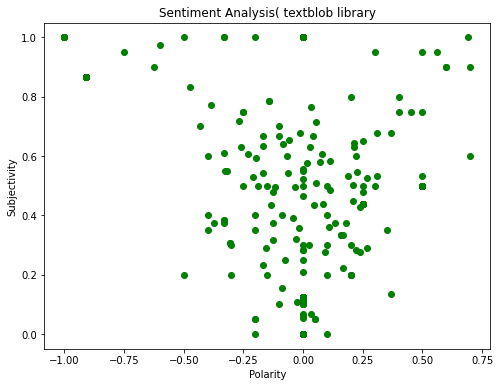

In [ ]:
plt.figure(figsize=(8,6))
for i in range(responseTable.shape[0]):
  plt.scatter(responseTable['Polarity'][i],responseTable['Subjectivity'][i],color='green')

plt.title('Sentiment Analysis( textblob library')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()